## Predicting Used Car Resale Value Using Machine Learning
### Objective:

Develop a machine learning model to accurately predict the resale value of used cars using the CarDekho dataset. The project will incorporate concepts from all five modules of our ML syllabus BCS602.

## Step 1: Introduction and Data Loading (Module 1)

In [1]:
# MODULE 1: Introduction to Machine Learning and Data Loading

# Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set_style('whitegrid')

# Machine Learning Context:
# In this project, we will predict the resale value of used cars.
# Supervised Learning (Regression) is used since we predict a continuous value.

# Data Loading:
file_path = 'cardekho_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("Data Preview:")
display(df.head())

# Drop unnecessary columns like 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic Information about the dataset
print("\nData Information:")
df.info()

# Statistical Summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

Data Preview:


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000



Missing values per column:
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9  

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## Step 2: Data Understanding and Visualization (Module 1 & Module 2)

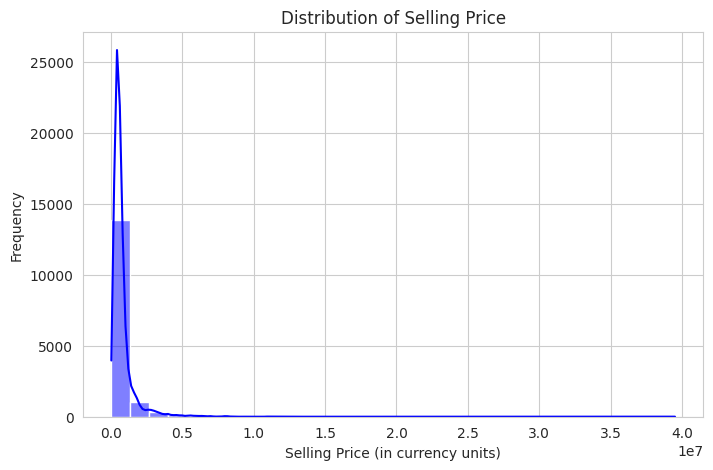

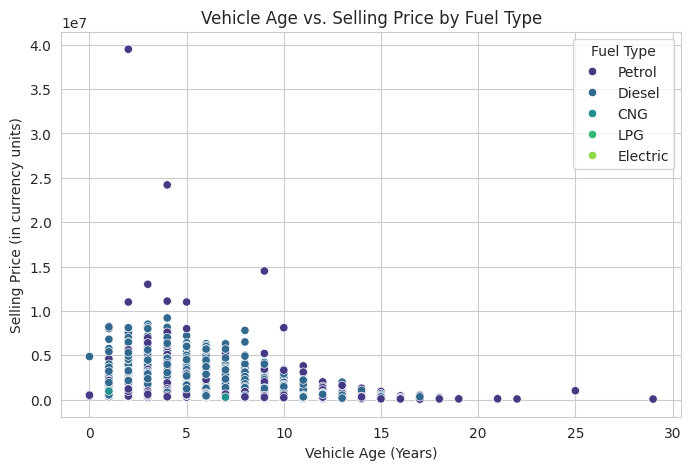

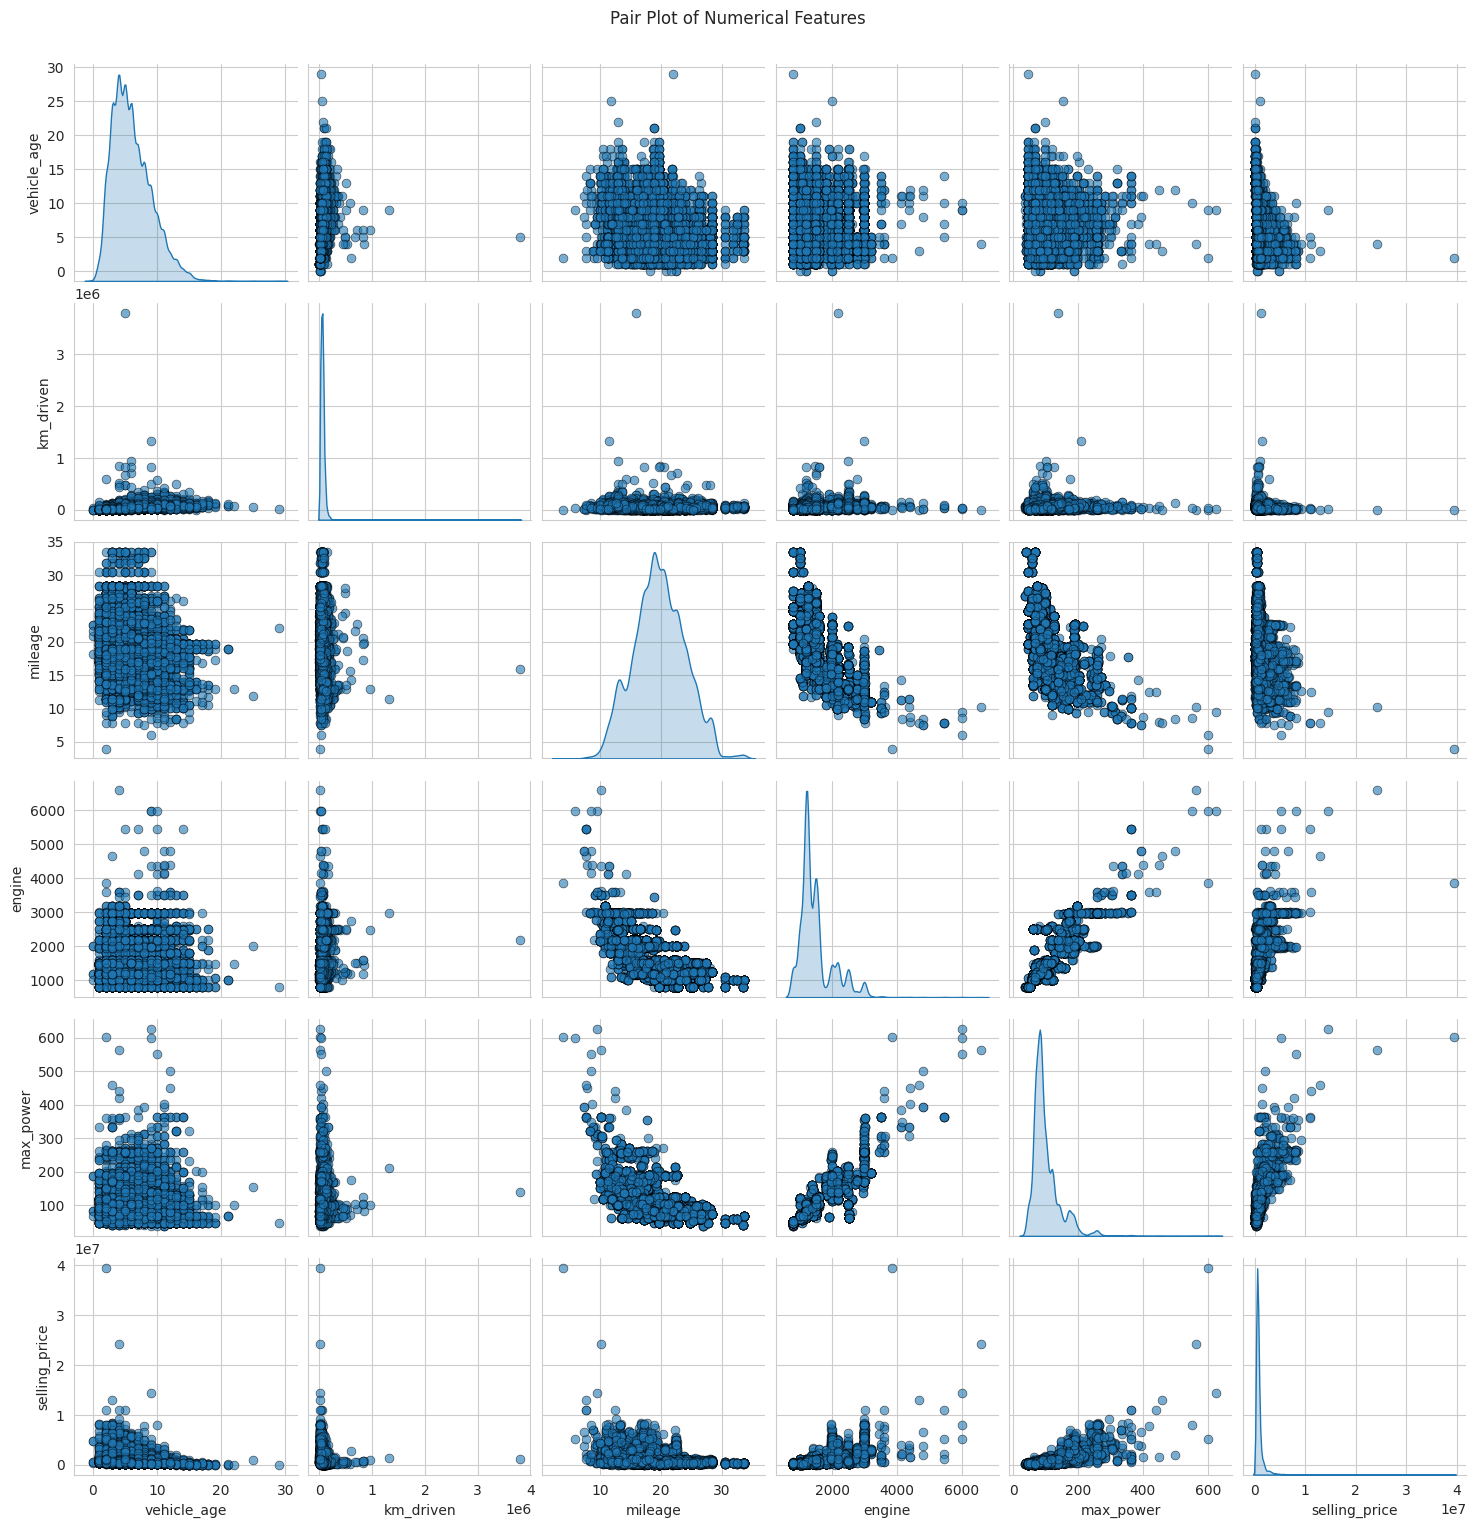

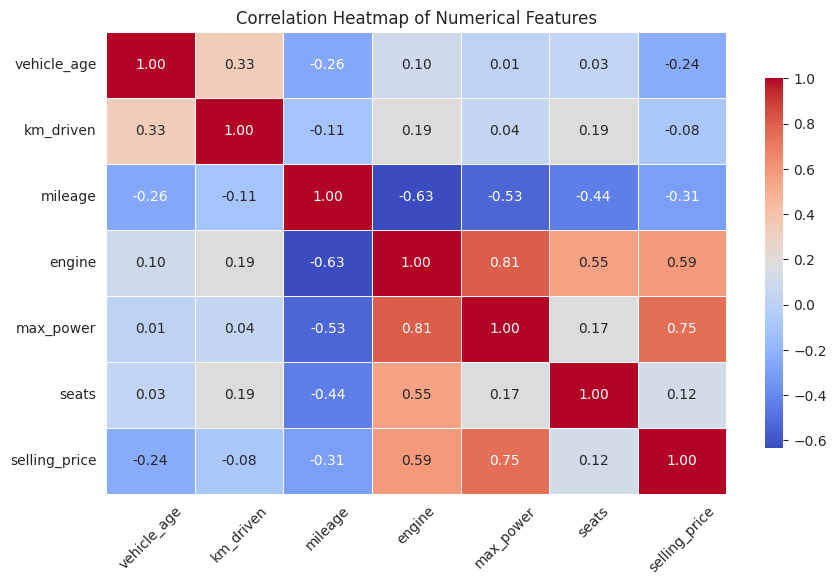

In [2]:
# MODULE 1: Data Visualization (Univariate Analysis)
# MODULE 2: Bivariate and Multivariate Data Analysis

# Univariate Analysis: Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in currency units)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bivariate Analysis: Relationship between vehicle age and selling price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df, hue='fuel_type', palette='viridis')
plt.title('Vehicle Age vs. Selling Price by Fuel Type')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Selling Price (in currency units)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

# Multivariate Analysis: Pair Plot of Numerical Features
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Correlation Heatmap (Multivariate Analysis)
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Step 3: Data Preprocessing and Feature Engineering (Module 2)

In [3]:
# MODULE 2: Feature Engineering and Data Preprocessing

# Drop non-numeric columns and redundant features
df = df.drop(columns=['car_name'])

# One-Hot Encoding for Categorical Features
categorical_cols = ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handling Missing Values (if any) by filling with median of each column
df = df.fillna(df.median())

# Checking data after preprocessing
print("\nData after Preprocessing:")
display(df.head())



Data after Preprocessing:


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,brand_BMW,brand_Bentley,brand_Datsun,...,model_i10,model_i20,model_redi-GO,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
1,5,20000,18.90,1197,82.00,5,550000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
2,11,60000,17.00,1197,80.00,5,215000,False,False,False,...,False,True,False,True,False,False,False,False,True,True
3,9,37000,20.92,998,67.10,5,226000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
4,6,30000,22.77,1498,98.59,5,570000,False,False,False,...,False,False,False,False,False,True,False,False,False,True


## Step 4: Model Building (Module 3 & 4)

In [4]:
# MODULE 3: Regression Models (Linear, Polynomial, Decision Tree)
# MODULE 4: Artificial Neural Networks (ANN)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Splitting the data into training and testing sets
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
ann_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=300)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
y_pred_lr = linear_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# ANN Model
ann_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=300)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
print('done')


/home/rgsuhas/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rgsuhas/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


done


## Step 5: Model Evaluation (Module 3 & 4)

In [5]:
# MODULE 3 & 4: Model Evaluation (Metrics)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))

# Evaluating each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regression")
evaluate_model(y_test, y_pred_ann, "Artificial Neural Network")



Linear Regression Performance:
MAE: 177718.47164022934
MSE: 150539582029.71484
R2 Score: 0.8000222854313681

Decision Tree Regression Performance:
MAE: 121198.87825710887
MSE: 82249376803.10034
R2 Score: 0.890739417660057

K-Nearest Neighbors Regression Performance:
MAE: 251909.21991566656
MSE: 268341547377.75705
R2 Score: 0.6435334239348307

Artificial Neural Network Performance:
MAE: 241822.33772981146
MSE: 189912575366.4461
R2 Score: 0.7477189568513052


## Step 6: Clustering (Module 5)

/tmp/ipykernel_6830/1618118324.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = kmeans.fit_predict(X)


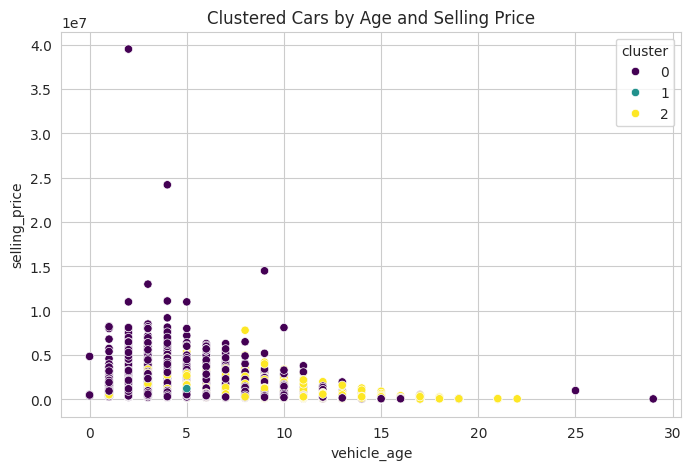

In [6]:
# MODULE 5: Clustering - K-Means for Segmenting Cars

from sklearn.cluster import KMeans

# Using K-Means to group cars based on features
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plotting clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='vehicle_age', y='selling_price', hue='cluster', data=df, palette='viridis')
plt.title('Clustered Cars by Age and Selling Price')
plt.show()


In [10]:

# MODULE 5: Model Testing with Sample Data
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    
# Function to test the model with a single sample input
def test_model(sample_input):
    print("Sample Input:", sample_input)

    # Converting the sample input to a DataFrame
    sample_df = pd.DataFrame([sample_input])

    # Identify missing columns
    missing_cols = set(X.columns) - set(sample_df.columns)
    missing_df = pd.DataFrame([{col: 0 for col in missing_cols}])

    # Combine sample input with missing columns
    sample_df = pd.concat([sample_df, missing_df], axis=1)

    # Reorder to match training features
    sample_df = sample_df[X.columns]

    # sample_df = create_features(sample_df)

    # Predict using trained models
    pred_lr = linear_model.predict(sample_df)[0]
    pred_tree = tree_model.predict(sample_df)[0]
    pred_knn = knn_model.predict(sample_df)[0]
    pred_ann = ann_model.predict(sample_df)[0]

    # Display predictions
    print("Predicted Resale Value (Linear Regression):", pred_lr)
    print("Predicted Resale Value (Decision Tree):", pred_tree)
    print("Predicted Resale Value (KNN):", pred_knn)
    print("Predicted Resale Value (ANN):", pred_ann)






# Example Sample Input (customize as needed)
sample_input = {
    'vehicle_age': 4,
    'km_driven': 28321,
    'mileage': 16.6,
    'engine': 1197,
    'max_power': 85,
    # Include one-hot encoded categorical features as well (set 0 or 1 appropriately)
    'brand_Maruti': 1,
    'model_Swift': 1,
    'seller_type_Individual': 0,
    'fuel_type_Petrol': 1,
    'transmission_type_Manual': 1,
}
test_model(sample_input)





Sample Input: {'vehicle_age': 4, 'km_driven': 28321, 'mileage': 16.6, 'engine': 1197, 'max_power': 85, 'brand_Maruti': 1, 'model_Swift': 1, 'seller_type_Individual': 0, 'fuel_type_Petrol': 1, 'transmission_type_Manual': 1}
Predicted Resale Value (Linear Regression): 819535.2520247144
Predicted Resale Value (Decision Tree): 511000.0
Predicted Resale Value (KNN): 599800.0
Predicted Resale Value (ANN): 602091.5218715688


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Define feature engineering function
def create_features(X):
    """Create new features for better prediction"""
    X = X.copy()
    
    # Create power per engine feature
    X['power_per_engine'] = X['max_power'] / (X['engine'] + 1e-8)
    
    # Create age-related features
    X['km_per_year'] = X['km_driven'] / (X['vehicle_age'] + 1e-8)
    
    # Create interaction features
    X['age_power'] = X['vehicle_age'] * X['max_power']
    X['mileage_engine'] = X['mileage'] * X['engine']
    
    return X

# Load and prepare data
df = pd.read_csv('/home/rgsuhas/Desktop/ml/cardekho_dataset.csv')

# Create dummy variables
df = pd.get_dummies(df, columns=['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'], drop_first=True)

# Select base features
numeric_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']
categorical_features = [col for col in df.columns if any(x in col for x in ['brand_', 'model_', 'seller_type_', 'fuel_type_', 'transmission_type_'])]
feature_columns = numeric_features + categorical_features

# Create initial X and y
X = df[feature_columns]
y = df['selling_price']

# Apply feature engineering BEFORE splitting
X = create_features(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features AFTER feature engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name} Results:")
    print(f"Training R² Score: {train_score:.4f}")
    print(f"Testing R² Score: {test_score:.4f}")
    print(f"RMSE: {rmse:.2f}")

def test_model(sample_input):
    print("Sample Input:", sample_input)

    # Convert the sample input to a DataFrame
    sample_df = pd.DataFrame([sample_input])
    
    # Apply feature engineering FIRST
    sample_df = create_features(sample_df)
    
    # Ensure all columns from training data are present
    for col in X.columns:
        if col not in sample_df.columns:
            sample_df[col] = 0
    
    # Reorder columns to match training data
    sample_df = sample_df[X.columns]
    sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

    
    # Scale the input
    sample_scaled = scaler.transform(sample_df)
    
    # Get predictions
    predictions = {}
    for name, model in models.items():
        pred = model.predict(sample_scaled)[0]
        predictions[name] = pred
    
    # Calculate ensemble prediction
    weights = {
        'Random Forest': 0.4,
        'Gradient Boosting': 0.3,
        'XGBoost': 0.3
    }
    
    ensemble_pred = sum(pred * weights[name] for name, pred in predictions.items())
    
    # Print predictions
    print("\nModel Predictions:")
    for name, pred in predictions.items():
        print(f"{name}: ₹{pred:,.2f}")
    print(f"\nEnsemble Prediction: ₹{ensemble_pred:,.2f}")
    
    return ensemble_pred



Training Random Forest...
Random Forest Results:
Training R² Score: 0.9718
Testing R² Score: 0.9359
RMSE: 219600.29

Training Gradient Boosting...
Gradient Boosting Results:
Training R² Score: 0.9672
Testing R² Score: 0.9388
RMSE: 214622.84

Training XGBoost...
XGBoost Results:
Training R² Score: 0.9843
Testing R² Score: 0.9436
RMSE: 206121.31


In [13]:
# sample test

# Example Sample Input (customize as needed)
sample_input = {
    'vehicle_age': 4,
    'km_driven': 28321,
    'mileage': 16.6,
    'engine': 1197,
    'max_power': 85,
    # Include one-hot encoded categorical features as well (set 0 or 1 appropriately)
    'brand_Maruti': 1,
    'model_Swift': 1,
    'seller_type_Individual': 0,
    'fuel_type_Petrol': 1,
    'transmission_type_Manual': 1,
}
test_model(sample_input)



Sample Input: {'vehicle_age': 4, 'km_driven': 28321, 'mileage': 16.6, 'engine': 1197, 'max_power': 85, 'brand_Maruti': 1, 'model_Swift': 1, 'seller_type_Individual': 0, 'fuel_type_Petrol': 1, 'transmission_type_Manual': 1}

Model Predictions:
Random Forest: ₹507,239.96
Gradient Boosting: ₹561,298.39
XGBoost: ₹505,883.88

Ensemble Prediction: ₹523,050.66


/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[c

523050.6615901978

In [14]:
print([col for col in X.columns if '_' in col])


['vehicle_age', 'km_driven', 'max_power', 'brand_BMW', 'brand_Bentley', 'brand_Datsun', 'brand_Ferrari', 'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_ISUZU', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land Rover', 'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Maserati', 'brand_Mercedes-AMG', 'brand_Mercedes-Benz', 'brand_Mini', 'brand_Nissan', 'brand_Porsche', 'brand_Renault', 'brand_Rolls-Royce', 'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'model_5', 'model_6', 'model_7', 'model_A4', 'model_A6', 'model_A8', 'model_Alto', 'model_Altroz', 'model_Alturas', 'model_Amaze', 'model_Aspire', 'model_Aura', 'model_Baleno', 'model_Bolero', 'model_C', 'model_C-Class', 'model_CLS', 'model_CR', 'model_CR-V', 'model_Camry', 'model_Carnival', 'model_Cayenne', 'model_Celerio', 'model_Ciaz', 'model_City', 'model_Civic', 'model_Compass', 'model_Continental', 'model_Cooper', 'model_Creta', 'model_D-Max'

In [21]:
sample_input = {
    # Required numeric features
    'vehicle_age': 5,
    'km_driven': 45000,
    'mileage': 18.5,
    'engine': 1197.0,
    'max_power': 83.0,
    'mileage': 17.6,

    # One-hot encoded brand
    'brand_Maruti': 1,

    # One-hot encoded model
    'model_Swift': 1,

    # Seller type (set one)
    'seller_type_Individual': 1,
    'seller_type_Trustmark Dealer': 0,

    # Fuel type (only one should be 1)
    'fuel_type_Petrol': 1,
    'fuel_type_Diesel': 0,
    'fuel_type_Electric': 0,
    'fuel_type_LPG': 0,

    # Transmission type
    'transmission_type_Manual': 1,

    # Engineered features — manually calculated OR created using `create_features()`
    'power_per_engine': 83.0 / (1197.0 + 1e-8),
    'km_per_year': 45000 / (5 + 1e-8),
    'age_power': 5 * 83.0,
    'mileage_engine': 18.5 * 1197.0,
}


# Run test
# for a given sample_input, test_model function automatically adds missing columns and fills them with 0.
test_model(sample_input)


Sample Input: {'vehicle_age': 5, 'km_driven': 45000, 'mileage': 17.6, 'engine': 1197.0, 'max_power': 83.0, 'brand_Maruti': 1, 'model_Swift': 1, 'seller_type_Individual': 1, 'seller_type_Trustmark Dealer': 0, 'fuel_type_Petrol': 1, 'fuel_type_Diesel': 0, 'fuel_type_Electric': 0, 'fuel_type_LPG': 0, 'transmission_type_Manual': 1, 'power_per_engine': 0.06934001670785848, 'km_per_year': 8999.999982, 'age_power': 415.0, 'mileage_engine': 22144.5}

Model Predictions:
Random Forest: ₹465,414.81
Gradient Boosting: ₹486,389.58
XGBoost: ₹476,717.88

Ensemble Prediction: ₹475,098.16


/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[c

475098.16079324513

In [20]:
sample_input = {
    # Basic numerical features
    'vehicle_age': 5,
    'km_driven': 40000,
    'max_power': 82,
     'engine': 1197.0,
        'mileage': 16.6,


    # One-hot encoded brand
    'brand_Maruti': 1,

    # One-hot encoded model
    'model_Swift': 1,

    # Seller type (e.g., Dealer vs Individual)
    'seller_type_Individual': 1,
    'seller_type_Trustmark Dealer': 0,

    # Fuel type (only one should be 1)
    'fuel_type_Petrol': 1,
    'fuel_type_Diesel': 0,
    'fuel_type_Electric': 0,
    'fuel_type_LPG': 0

    # Optional: other one-hot features set to 0
    # (you can skip specifying them manually if your code auto-fills them with 0s)
}
test_model(sample_input)



Sample Input: {'vehicle_age': 5, 'km_driven': 40000, 'max_power': 82, 'engine': 1197.0, 'mileage': 16.6, 'brand_Maruti': 1, 'model_Swift': 1, 'seller_type_Individual': 1, 'seller_type_Trustmark Dealer': 0, 'fuel_type_Petrol': 1, 'fuel_type_Diesel': 0, 'fuel_type_Electric': 0, 'fuel_type_LPG': 0}

Model Predictions:
Random Forest: ₹480,899.82
Gradient Boosting: ₹559,395.77
XGBoost: ₹521,853.81

Ensemble Prediction: ₹516,734.80


/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[col] = 0
/tmp/ipykernel_6830/1614618633.py:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[c

516734.8009748167